In [1]:
import pandas as pd
import graphviz
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn import tree
le = preprocessing.LabelEncoder()

!rm titanic-en.csv
!wget https://raw.githubusercontent.com/bdm-unlu/2020/master/TPs/TP05/TP0501/titanic-en.csv

rm: cannot remove 'titanic-en.csv': No such file or directory
--2020-11-23 10:56:13--  https://raw.githubusercontent.com/bdm-unlu/2020/master/TPs/TP05/TP0501/titanic-en.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.216.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.216.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42177 (41K) [text/plain]
Saving to: ‘titanic-en.csv’

titanic-en.csv      100%[===================>]  41.19K  --.-KB/s    in 0.005s  

2020-11-23 10:56:14 (7.66 MB/s) - ‘titanic-en.csv’ saved [42177/42177]



In [2]:
data = pd.read_csv("titanic-en.csv")
le = preprocessing.LabelEncoder()
for column_name in data.columns:
  if (data[column_name].dtype == object) & (column_name!='survived'):
    data[column_name] = le.fit_transform(data[column_name])

data.head()

,class,age,sex,survived
0,0,0,1,yes
1,0,0,1,yes
2,0,0,1,yes
3,0,0,1,yes
4,0,0,1,yes


In [3]:
# Features
feature_names = list(data.columns)
feature_names.remove('survived')
x = data[feature_names]

# Target
y = data.survived
le.fit(data['survived'])
target_values=le.classes_

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)
arbol = tree.DecisionTreeClassifier(criterion='entropy')
arbol = arbol.fit(X_train,y_train)
y_pred = arbol.predict(X_test)

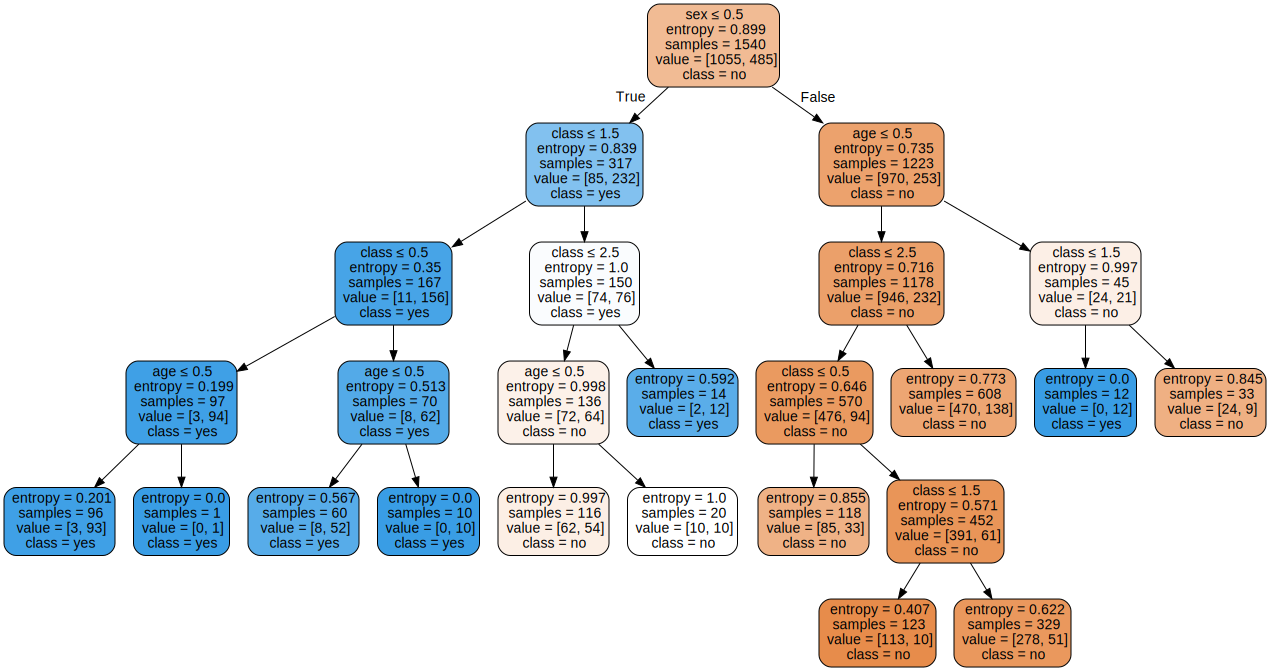

In [5]:
dot_data = tree.export_graphviz(arbol, out_file=None,
                                feature_names=feature_names,
                                class_names= target_values,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [6]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Vemos un reporte de clasificación de varias métricas
print(metrics.classification_report(y_test, y_pred))
species = np.array(y_test)
predictions = np.array(y_pred)
mat = metrics.confusion_matrix(species, predsictions)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_values, yticklabels=target_values)

plt.xlabel('true label')
plt.ylabel('predicted label');

Accuracy: 0.783661119515885
              precision    recall  f1-score   support

          no       0.76      0.98      0.86       435
         yes       0.93      0.40      0.56       226

    accuracy                           0.78       661
   macro avg       0.84      0.69      0.71       661
weighted avg       0.82      0.78      0.75       661



NameError: name 'predsictions' is not defined

El Arbol resultante tiene 6 niveles de profundidad y 13 hojas.
Varias de las hojas tiene cantidades bajas de "samples"/registros por lo que las mismas podrian ser podadas.
El arbol no tiene una buena accurracy, ya q es del 0.78% y tiene un bajo recall para la categoria "survive:true",
 ya que de los 226 que se salvaron soslo califico a 90.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)
arbol = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=40)
arbol = arbol.fit(X_train,y_train)
y_pred = arbol.predict(X_test)
dot_data = tree.export_graphviz(arbol, out_file=None,
                                feature_names=feature_names,
                                class_names= target_values,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Vemos un reporte de clasificación de varias métricas
print(metrics.classification_report(y_test, y_pred))
species = np.array(y_test)
predictions = np.array(y_pred)
mat = metrics.confusion_matrix(species, predictions)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_values, yticklabels=target_values)

plt.xlabel('true label')
plt.ylabel('predicted label');

El Arbol resultante tiene es mas chico, pero viendo el accurracy, recall y precision la prediccion del arbol no mejora.
pruebo con otras variaciones.
* con test_size=0.2 y min_samples_leaf=40 tampoco mejora (acc: 0.745)
* con test_size=0.2, min_samples_leaf=40 y max_depth=4 tampoco mejora (acc: 0.759)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)
arbol = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=40, max_depth=4)
arbol = arbol.fit(X_train,y_train)
y_pred = arbol.predict(X_test)
dot_data = tree.export_graphviz(arbol, out_file=None,
                                feature_names=feature_names,
                                class_names= target_values,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Vemos un reporte de clasificación de varias métricas
print(metrics.classification_report(y_test, y_pred))
species = np.array(y_test)
predictions = np.array(y_pred)
mat = metrics.confusion_matrix(species, predictions)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_values, yticklabels=target_values)

plt.xlabel('true label')
plt.ylabel('predicted label');